In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df_suministro = pd.read_parquet("suministros.parquet")

In [3]:
df_suministro

,DEPARTAMENTO,NRO_SERVICIO,TIPO_TARIFARIO,CONEXION,COORDENADA_X,COORDENADA_Y,consumo_201001,consumo_201002,consumo_201003,consumo_201004,...,consumo_202110,consumo_202111,consumo_202112,consumo_202201,consumo_202202,consumo_202203,consumo_202204,consumo_202205,consumo_202206,consumo_202207
0,La Libertad,63435012.0,BT5BR,MONOFÁSICO,-78.976071,-8.062080,NaN,NaN,NaN,NaN,...,14.0,14.0,14.0,16.0,14.0,15.0,14.0,15.0,15.0,14.0
1,La Libertad,63448244.0,BT5BR,MONOFÁSICO,-79.004644,-8.065706,NaN,NaN,NaN,NaN,...,8.0,7.0,10.0,7.0,6.0,8.0,9.0,10.0,13.0,13.0
2,La Libertad,66916519.0,BT5B,TRIFÁSICO,-79.060620,-8.043771,NaN,NaN,NaN,NaN,...,75.0,58.0,50.0,93.0,213.0,90.0,172.0,102.0,1.0,46.0
3,La Libertad,63190967.0,BT5BR,MONOFÁSICO,-79.069450,-8.020960,NaN,NaN,NaN,NaN,...,21.0,21.0,27.0,26.0,29.0,39.0,39.0,37.0,28.0,NaN
4,La Libertad,63195749.0,BT5BR,MONOFÁSICO,-78.975008,-8.062605,NaN,NaN,NaN,NaN,...,4.0,3.0,3.0,4.0,3.0,NaN,1.0,2.0,27.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63731,La Libertad,66890557.0,BT5BR,MONOFÁSICO,-79.007886,-8.072484,NaN,NaN,NaN,NaN,...,165.0,129.0,127.0,108.0,65.0,103.0,67.0,126.0,120.0,139.0
63732,La Libertad,64601931.0,BT5BR,MONOFÁSICO,-79.005980,-8.063865,NaN,NaN,NaN,NaN,...,40.0,13.0,9.0,8.0,41.0,NaN,NaN,NaN,NaN,NaN
63733,La Libertad,64625808.0,BT5BR,MONOFÁSICO,-78.997961,-8.081444,NaN,NaN,NaN,NaN,...,37.0,44.0,34.0,47.0,39.0,80.0,42.0,45.0,39.0,30.0
63734,La Libertad,64667281.0,BT5BR,MONOFÁSICO,-78.977805,-8.063977,NaN,NaN,NaN,NaN,...,74.0,84.0,88.0,95.0,86.0,91.0,82.0,74.0,58.0,61.0


In [7]:
#df_suministro.to_csv("suministros.csv", sep=';', index=False)  # código para transformar a CSV

In [9]:
print(df_suministro.columns)

Index(['DEPARTAMENTO', 'NRO_SERVICIO', 'TIPO_TARIFARIO', 'CONEXION',
       'COORDENADA_X', 'COORDENADA_Y', 'consumo_201001', 'consumo_201002',
       'consumo_201003', 'consumo_201004',
       ...
       'consumo_202110', 'consumo_202111', 'consumo_202112', 'consumo_202201',
       'consumo_202202', 'consumo_202203', 'consumo_202204', 'consumo_202205',
       'consumo_202206', 'consumo_202207'],
      dtype='object', length=157)


In [11]:
df_suministro.isnull().sum()

DEPARTAMENTO         0
NRO_SERVICIO         0
TIPO_TARIFARIO       0
CONEXION             0
COORDENADA_X       503
                  ... 
consumo_202203    6391
consumo_202204    6315
consumo_202205    6219
consumo_202206    6255
consumo_202207    6269
Length: 157, dtype: int64

In [13]:
# Seleccionar solo las columnas de consumo
columnas_consumo = [col for col in df_suministro.columns if col.startswith("consumo_")]
df_consumo = df_suministro[columnas_consumo].copy()

In [15]:
nulos_porcentaje = df_consumo.isnull().mean() * 100
print(nulos_porcentaje.sort_values(ascending=False))

consumo_201001    45.131480
consumo_201002    45.074997
consumo_201003    45.048324
consumo_201004    45.046755
consumo_201005    44.552529
                    ...    
consumo_202203    10.027300
consumo_202204     9.908058
consumo_202207     9.835886
consumo_202206     9.813920
consumo_202205     9.757437
Length: 151, dtype: float64


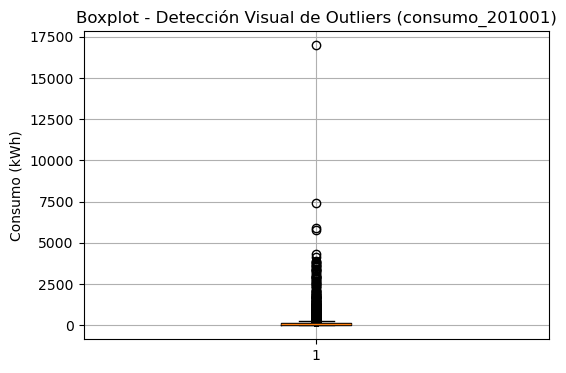

In [17]:
########Grafica de Boxplot

import matplotlib.pyplot as plt

# Paso 1: Extraer la variable y eliminar nulos
df = df_suministro[['consumo_201001']].dropna()
df = df.rename(columns={'consumo_201001': 'valor'})  # renombrar para mantener consistencia

# Paso 2: Visualización inicial
plt.figure(figsize=(6, 4))
plt.boxplot(df['valor'])
plt.title("Boxplot - Detección Visual de Outliers (consumo_201001)")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.show()



In [19]:
##################################### Métodos de Detección Outlier ####################

In [21]:
#######   Método IQR #########

# Paso 1: Seleccionar y preparar la variable
df = df_consumo[['consumo_201001']].dropna().rename(columns={'consumo_201001': 'valor'})

# Paso 2: Calcular columnas adicionales
df['z_score'] = zscore(df['valor'])
df['valor_shifted'] = df['valor'] - df['valor'].min()
df['diff'] = df['valor'] - df['valor'].median()
mad = np.mean(np.abs(df['diff']))  # cálculo manual de MAD
df['mad_score'] = df['diff'] / mad

# Paso 3: Aplicar método IQR
Q1 = df['valor'].quantile(0.25)
Q3 = df['valor'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Paso 4: Filtrar los outliers
outliers_iqr = df[(df['valor'] < limite_inferior) | (df['valor'] > limite_superior)]

# Paso 5: Mostrar resumen con todas las métricas
outliers_iqr.describe()



,valor,z_score,valor_shifted,diff,mad_score
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000
mean,519.485683,2.197587,519.455683,456.485683,6.466478
std,621.386612,3.250610,621.386612,621.386612,8.802429
min,263.000000,0.855854,262.970000,200.000000,2.833157
25%,302.000000,1.059871,301.970000,239.000000,3.385622
50%,367.000000,1.399901,366.970000,304.000000,4.306398
75%,514.000000,2.168890,513.970000,451.000000,6.388769
max,16983.600000,88.324978,16983.570000,16920.600000,239.693568


In [23]:
############## Método Z-Score (estandarización)

# --- Paso 1: Preparar el DataFrame (ajusta la columna si es necesario) ---
# --- Paso 2: Calcular Z-Score ---
df['z_score'] = zscore(df['valor'])

# --- Paso 3: Calcular otras columnas útiles ---
df['valor_shifted'] = df['valor'] - df['valor'].min()
df['diff'] = df['valor'] - df['valor'].median()
mad = np.mean(np.abs(df['diff']))
df['mad_score'] = df['diff'] / mad

# --- Paso 4: Detectar outliers con Z-Score (abs > 3) ---
outliers_z = df[df['z_score'].abs() > 3]

# --- Paso 5: Mostrar resumen de los outliers ---
print("Resumen de outliers detectados por Z-Score:")
print(outliers_z.describe())

Resumen de outliers detectados por Z-Score:
              valor     z_score  valor_shifted          diff   mad_score
count    285.000000  285.000000     285.000000    285.000000  285.000000
mean    1396.966807    6.787883    1396.936807   1333.966807   18.896686
std     1339.669596    7.008105    1339.669596   1339.669596   18.977470
min      674.000000    3.005885     673.970000    611.000000    8.655294
25%      775.000000    3.534238     774.970000    712.000000   10.086038
50%      956.000000    4.481089     955.970000    893.000000   12.650045
75%     1451.000000    7.070542    1450.970000   1388.000000   19.662108
max    16983.600000   88.324978   16983.570000  16920.600000  239.693568


In [25]:
########################Método MAD (Desviación Absoluta Mediana)

# Paso 1: Preparar el DataFrame
# Paso 2: Calcular columnas auxiliares
df['z_score'] = zscore(df['valor'])  # z-score
df['valor_shifted'] = df['valor'] - df['valor'].min()  # valor ajustado
df['diff'] = df['valor'] - df['valor'].median()  # diferencia con mediana
mad = np.median(np.abs(df['valor'] - df['valor'].median()))  # MAD robusto
df['mad_score'] = 0.6745 * (df['valor'] - df['valor'].median()) / mad  # z-score robusto

# Paso 3: Filtrar outliers por MAD (> 3.5)
outliers_mad = df[np.abs(df['mad_score']) > 3.5]

# Paso 4: Mostrar tabla resumen como en la imagen
resumen = outliers_mad[['valor', 'z_score', 'valor_shifted', 'diff', 'mad_score']].describe()
print(resumen)

              valor      z_score  valor_shifted          diff    mad_score
count   1834.000000  1834.000000    1834.000000   1834.000000  1834.000000
mean     546.202208     2.337347     546.172208    483.202208     7.949266
std      647.893375     3.389272     647.893375    647.893375    10.658636
min      276.000000     0.923860     275.970000    213.000000     3.504110
25%      315.000000     1.127877     314.970000    252.000000     4.145707
50%      384.000000     1.488831     383.970000    321.000000     5.280841
75%      541.500000     2.312748     541.470000    478.500000     7.871909
max    16983.600000    88.324978   16983.570000  16920.600000   278.364505


In [27]:
########### Método Percentiles extremos

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular columnas auxiliares ---
df['z_score'] = zscore(df['valor'])  # estandarización
df['valor_shifted'] = df['valor'] - df['valor'].min()  # valor trasladado
df['diff'] = df['valor'] - df['valor'].median()  # diferencia con la mediana

# --- Paso 3: Calcular límites de percentil 1% y 99% ---
limite_inf = df['valor'].quantile(0.01)
limite_sup = df['valor'].quantile(0.99)

# --- Paso 4: Filtrar outliers por percentiles ---
outliers_pct = df[(df['valor'] < limite_inf) | (df['valor'] > limite_sup)]

# --- Paso 5: Mostrar resumen ---
print("Outliers detectados con percentiles (1% y 99%):")
print(outliers_pct[['valor', 'z_score', 'valor_shifted', 'diff']].describe())


Outliers detectados con percentiles (1% y 99%):
              valor     z_score  valor_shifted          diff
count    408.000000  408.000000     408.000000    408.000000
mean    1076.798235    5.113011    1076.768235   1013.798235
std     1233.555538    6.452999    1233.555538   1233.555538
min        0.030000   -0.519800       0.000000    -62.970000
25%      654.750000    2.905184     654.720000    591.750000
50%      793.000000    3.628400     792.970000    730.000000
75%     1104.500000    5.257925    1104.470000   1041.500000
max    16983.600000   88.324978   16983.570000  16920.600000


In [29]:
############### Método por diferencias sucesivas (series temporales)

# --- Paso 1: Preparar el DataFrame ---
# --- Paso 2: Calcular z_score y columnas auxiliares ---
df['z_score'] = zscore(df['valor'])
df['valor_shifted'] = df['valor'].shift(1)  # desplazamiento temporal
df['diff'] = (df['valor'] - df['valor_shifted']).abs()  # diferencia absoluta entre valores consecutivos

# --- Paso 3: Definir umbral como media + 3 * desviación estándar de la diferencia ---
umbral = df['diff'].mean() + 3 * df['diff'].std()

# --- Paso 4: Filtrar outliers por salto abrupto ---
outliers_diff = df[df['diff'] > umbral]

# --- Paso 5: Mostrar resumen de outliers detectados por diferencia temporal ---
print("Outliers detectados por saltos abruptos (diferencia temporal):")
print(outliers_diff[['valor', 'z_score', 'valor_shifted', 'diff']].describe())


Outliers detectados por saltos abruptos (diferencia temporal):
              valor     z_score  valor_shifted          diff
count    301.000000  301.000000     301.000000    301.000000
mean    1003.960997    4.731983    1035.555847   1813.270000
std     1499.732616    7.845430    1488.790636   1577.396759
min        1.000000   -0.514726       1.000000    815.000000
25%       48.000000   -0.268858      66.000000    955.110000
50%      491.000000    2.048572     906.000000   1234.000000
75%     1347.000000    6.526495    1347.000000   2238.400000
max    16983.600000   88.324978   16983.600000  16963.600000


In [31]:
################################# Visualización con Seaborn

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

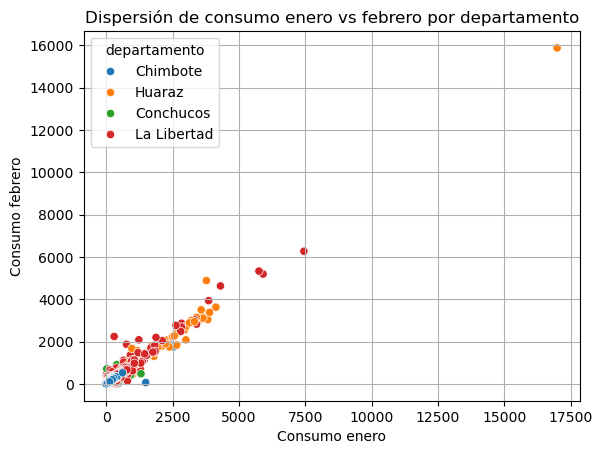

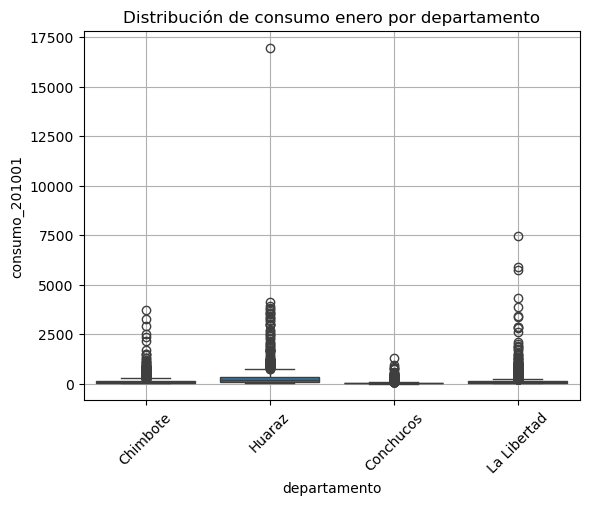

In [35]:
# Limpieza de nombres de columnas para evitar errores
df_suministro.columns = df_suministro.columns.str.strip().str.lower()

# Copia con columnas relevantes
df_plot = df_suministro[['consumo_201001', 'consumo_201002', 'departamento']].dropna()

# Gráfico de dispersión
sns.scatterplot(data=df_plot, x='consumo_201001', y='consumo_201002', hue='departamento')
plt.title("Dispersión de consumo enero vs febrero por departamento")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()

# Boxplot de consumo enero por departamento
sns.boxplot(data=df_plot, x='departamento', y='consumo_201001')
plt.title("Distribución de consumo enero por departamento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [36]:
###########################  Detección multivariable con distancia de Mahalanobis

In [39]:
from scipy.spatial import distance
from scipy.stats import chi2

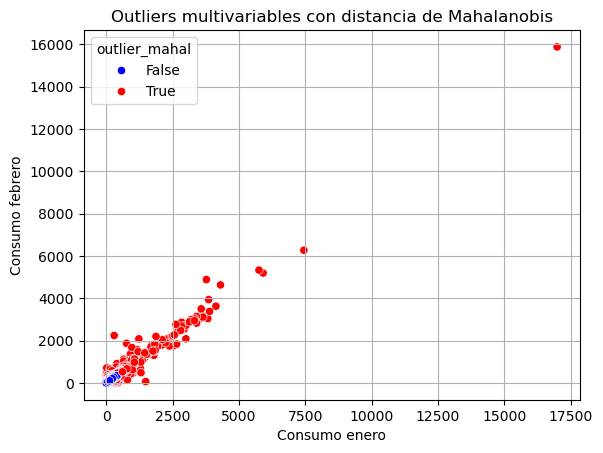

In [41]:
# Selección de variables para análisis multivariado
X = df_suministro[['consumo_201001', 'consumo_201002']].dropna()

# Calcular media y matriz de covarianza
mean_vec = X.mean().values
cov_matrix = np.cov(X.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Función para calcular distancia de Mahalanobis
def mahalanobis_distance(row, mean, inv_cov):
    return distance.mahalanobis(row, mean, inv_cov)

# Calcular la distancia para cada fila
X['mahal_dist'] = X.apply(lambda row: mahalanobis_distance(row, mean_vec, inv_cov_matrix), axis=1)

# Umbral chi-cuadrado con 2 grados de libertad (por 2 variables)
umbral = np.sqrt(chi2.ppf(0.975, df=2))  # ≈ 2.4477

# Clasificación de outliers
X['outlier_mahal'] = X['mahal_dist'] > umbral

# Visualización
sns.scatterplot(data=X, x='consumo_201001', y='consumo_201002', hue='outlier_mahal', palette={True: 'red', False: 'blue'})
plt.title("Outliers multivariables con distancia de Mahalanobis")
plt.xlabel("Consumo enero")
plt.ylabel("Consumo febrero")
plt.grid(True)
plt.show()


In [43]:
############################## Metodos para Imputar valores Faltantes

In [45]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = df_suministro = pd.read_parquet("suministros.parquet")

In [49]:
df.columns = df.columns.str.strip().str.lower()

In [51]:
# Ver nombres exactos de columnas luego de pasar a minúsculas
print(df.columns.tolist())

['departamento', 'nro_servicio', 'tipo_tarifario', 'conexion', 'coordenada_x', 'coordenada_y', 'consumo_201001', 'consumo_201002', 'consumo_201003', 'consumo_201004', 'consumo_201005', 'consumo_201006', 'consumo_201007', 'consumo_201008', 'consumo_201009', 'consumo_201010', 'consumo_201011', 'consumo_201012', 'consumo_201101', 'consumo_201102', 'consumo_201103', 'consumo_201104', 'consumo_201105', 'consumo_201106', 'consumo_201107', 'consumo_201108', 'consumo_201109', 'consumo_201110', 'consumo_201111', 'consumo_201112', 'consumo_201201', 'consumo_201202', 'consumo_201203', 'consumo_201204', 'consumo_201205', 'consumo_201206', 'consumo_201207', 'consumo_201208', 'consumo_201209', 'consumo_201210', 'consumo_201211', 'consumo_201212', 'consumo_201301', 'consumo_201302', 'consumo_201303', 'consumo_201304', 'consumo_201305', 'consumo_201306', 'consumo_201307', 'consumo_201308', 'consumo_201309', 'consumo_201310', 'consumo_201311', 'consumo_201312', 'consumo_201401', 'consumo_201402', 'cons

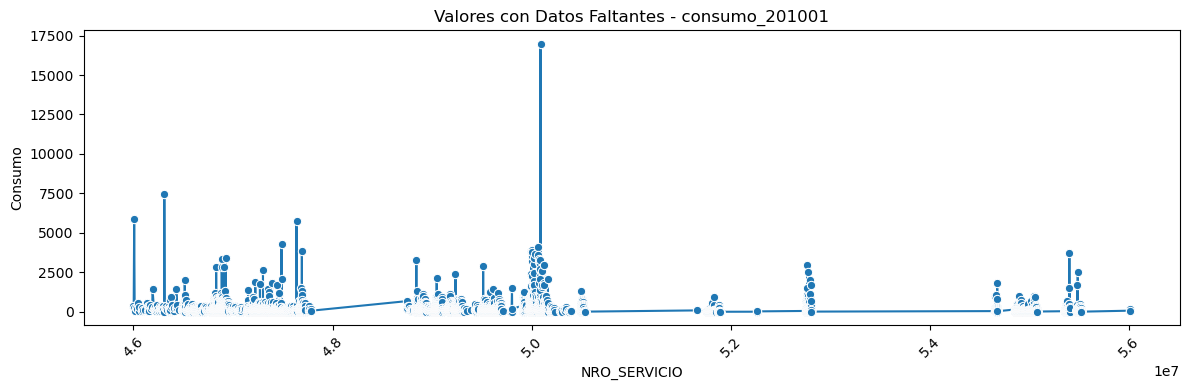

In [53]:
# Seleccionar columnas y renombrar
df_plot = df[['nro_servicio', 'consumo_201001']].copy()
df_plot = df_plot.rename(columns={'nro_servicio': 'fecha', 'consumo_201001': 'valor'})

# Gráfico de valores con posibles faltantes
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_plot, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# 2. Imputación con la media (promedio)
df_media = df[['nro_servicio', 'consumo_201001']].copy()
# Crear copia de df_plot para imputación con la media
df_media = df_plot.copy()

# Calcular la media sin contar los valores NaN
media = df_media['valor'].mean()

# Reemplazar los NaN con la media
df_media['valor'] = df_media['valor'].fillna(media)


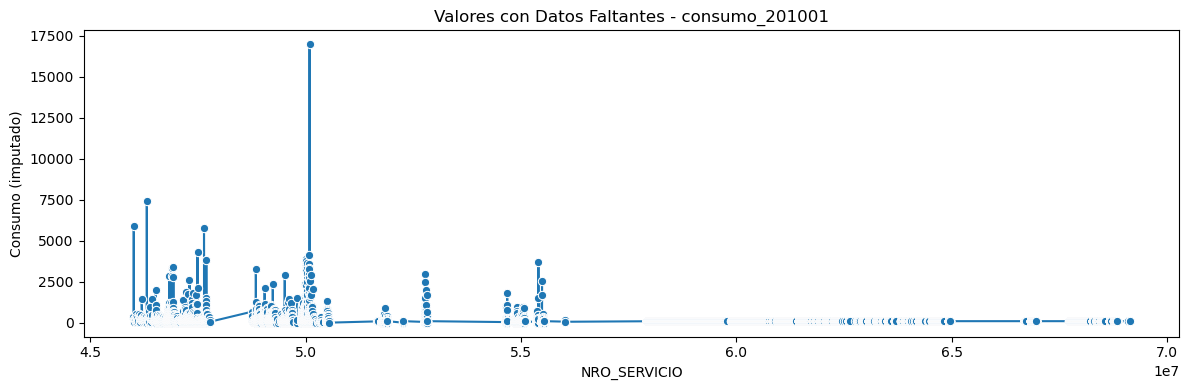

In [57]:
# Gráfico de la serie imputada con la media
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_media, x='fecha', y='valor', marker='o')
plt.title("Valores con Datos Faltantes - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado)")
plt.tight_layout()
plt.show()

In [59]:
# 3. Imputación con la media +/- desviación estándar (valor aleatorio)
df_std = df_plot.copy()

# Calcular media y desviación estándar de los valores no nulos
mean = df_std['valor'].mean()
std = df_std['valor'].std()

# Aplicar imputación aleatoria dentro del rango [mean - std, mean + std]
df_std['valor'] = df_std['valor'].apply(
    lambda x: x if not pd.isna(x) else np.random.uniform(mean - std, mean + std)
)

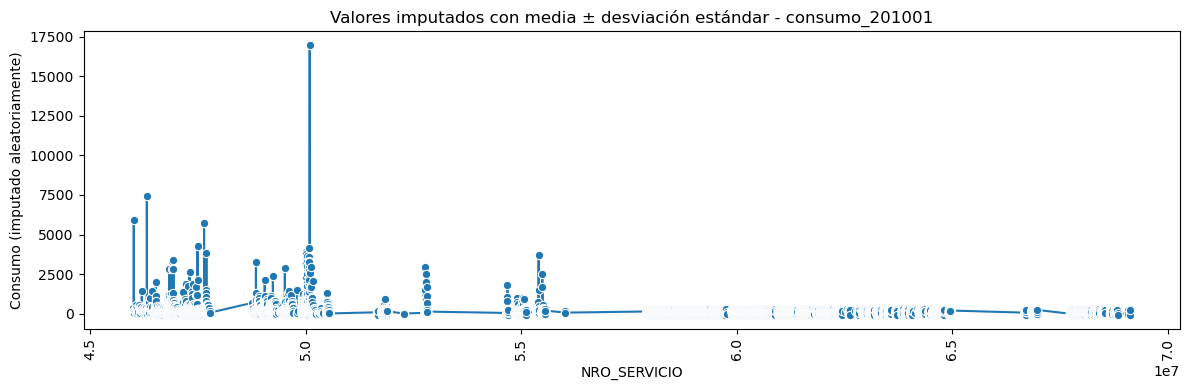

In [61]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_std, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con media ± desviación estándar - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (imputado aleatoriamente)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# 4. Imputación personalizada: promedio entre anterior y posterior
df_interp = df_plot.copy()

# Aplicar imputación fila por fila
for i in range(len(df_interp)):
    if pd.isna(df_interp.iloc[i]['valor']):
        prev_val = df_interp.iloc[i - 1]['valor'] if i > 0 else np.nan
        next_val = df_interp.iloc[i + 1]['valor'] if i < len(df_interp) - 1 else np.nan

        if not np.isnan(prev_val) and not np.isnan(next_val):
            df_interp.at[i, 'valor'] = (prev_val + next_val) / 2
        else:
            df_interp.at[i, 'valor'] = 0  # Si uno de los dos no existe o es NaN


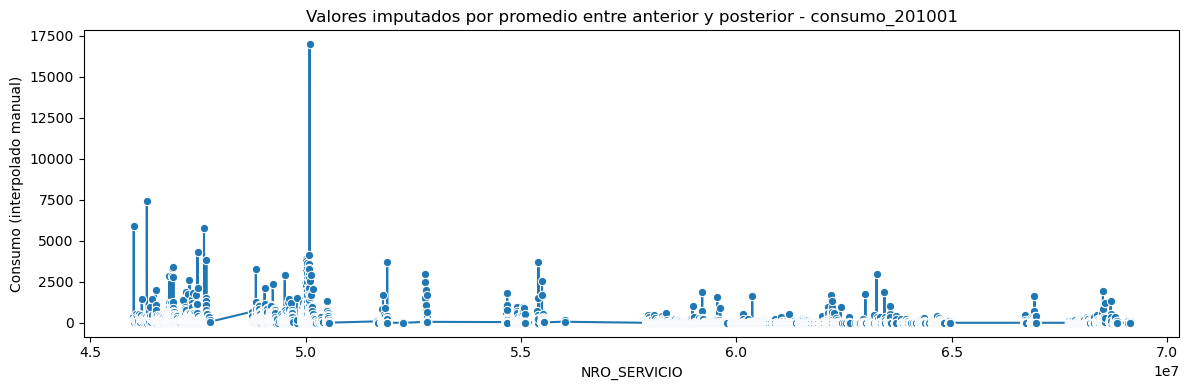

In [64]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_interp, x='fecha', y='valor', marker='o')
plt.title("Valores imputados por promedio entre anterior y posterior - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (interpolado manual)")
plt.tight_layout()
plt.show()


In [65]:
# 5. Imputación con Promedios Móviles (ventana de 6 posiciones)
df_movavg = df_plot.copy()

# Aplicar imputación con promedio móvil (rolling mean)
df_movavg['valor'] = df_movavg['valor'].fillna(
    df_movavg['valor'].rolling(window=6, min_periods=1).mean()
)

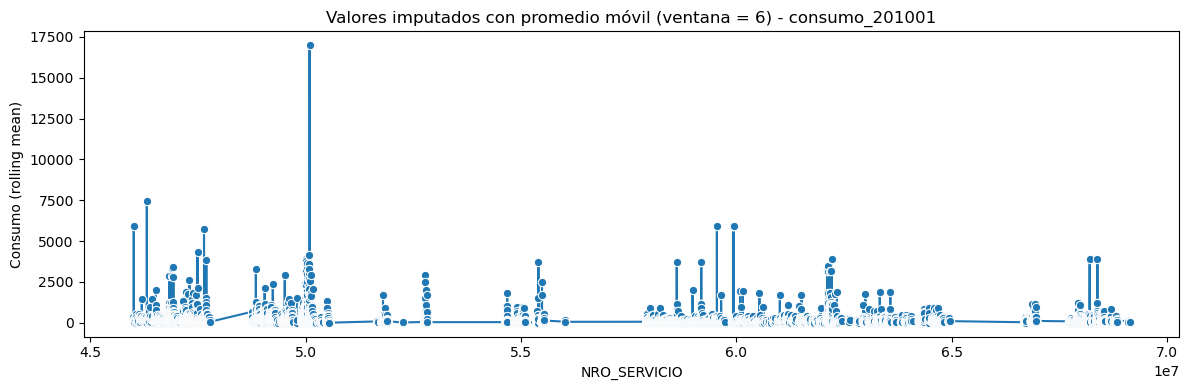

In [66]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_movavg, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con promedio móvil (ventana = 6) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (rolling mean)")
plt.tight_layout()
plt.show()

In [71]:
# 6. Imputación con técnicas de propagación
df_ffill = df_plot.copy()
df_ffill['valor'] = df_ffill['valor'].fillna(method='ffill')  # Hacia adelante

df_bfill = df_plot.copy()
df_bfill['valor'] = df_bfill['valor'].fillna(method='bfill')  # Hacia atrás

C:\Users\47296403\AppData\Local\Temp\ipykernel_4788\3692733957.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['valor'] = df_ffill['valor'].fillna(method='ffill')  # Hacia adelante
C:\Users\47296403\AppData\Local\Temp\ipykernel_4788\3692733957.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['valor'] = df_bfill['valor'].fillna(method='bfill')  # Hacia atrás


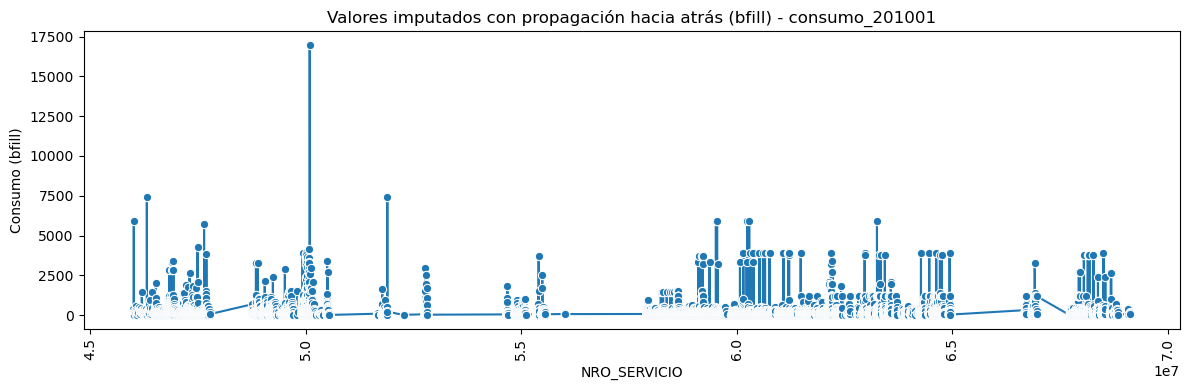

In [73]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_bfill, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con propagación hacia atrás (bfill) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (bfill)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [75]:
# 7. Imputación con un valor constante (por ejemplo, 0)
df_const = df_plot.copy()
df_const['valor'] = df_const['valor'].fillna(0)

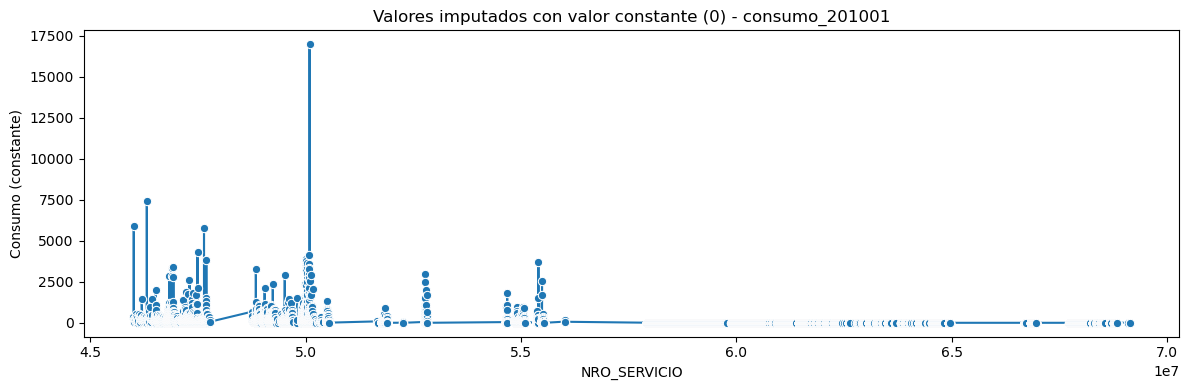

In [77]:
# Visualización
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_const, x='fecha', y='valor', marker='o')
plt.title("Valores imputados con valor constante (0) - consumo_201001")
plt.xlabel("NRO_SERVICIO")
plt.ylabel("Consumo (constante)")
plt.tight_layout()
plt.show()


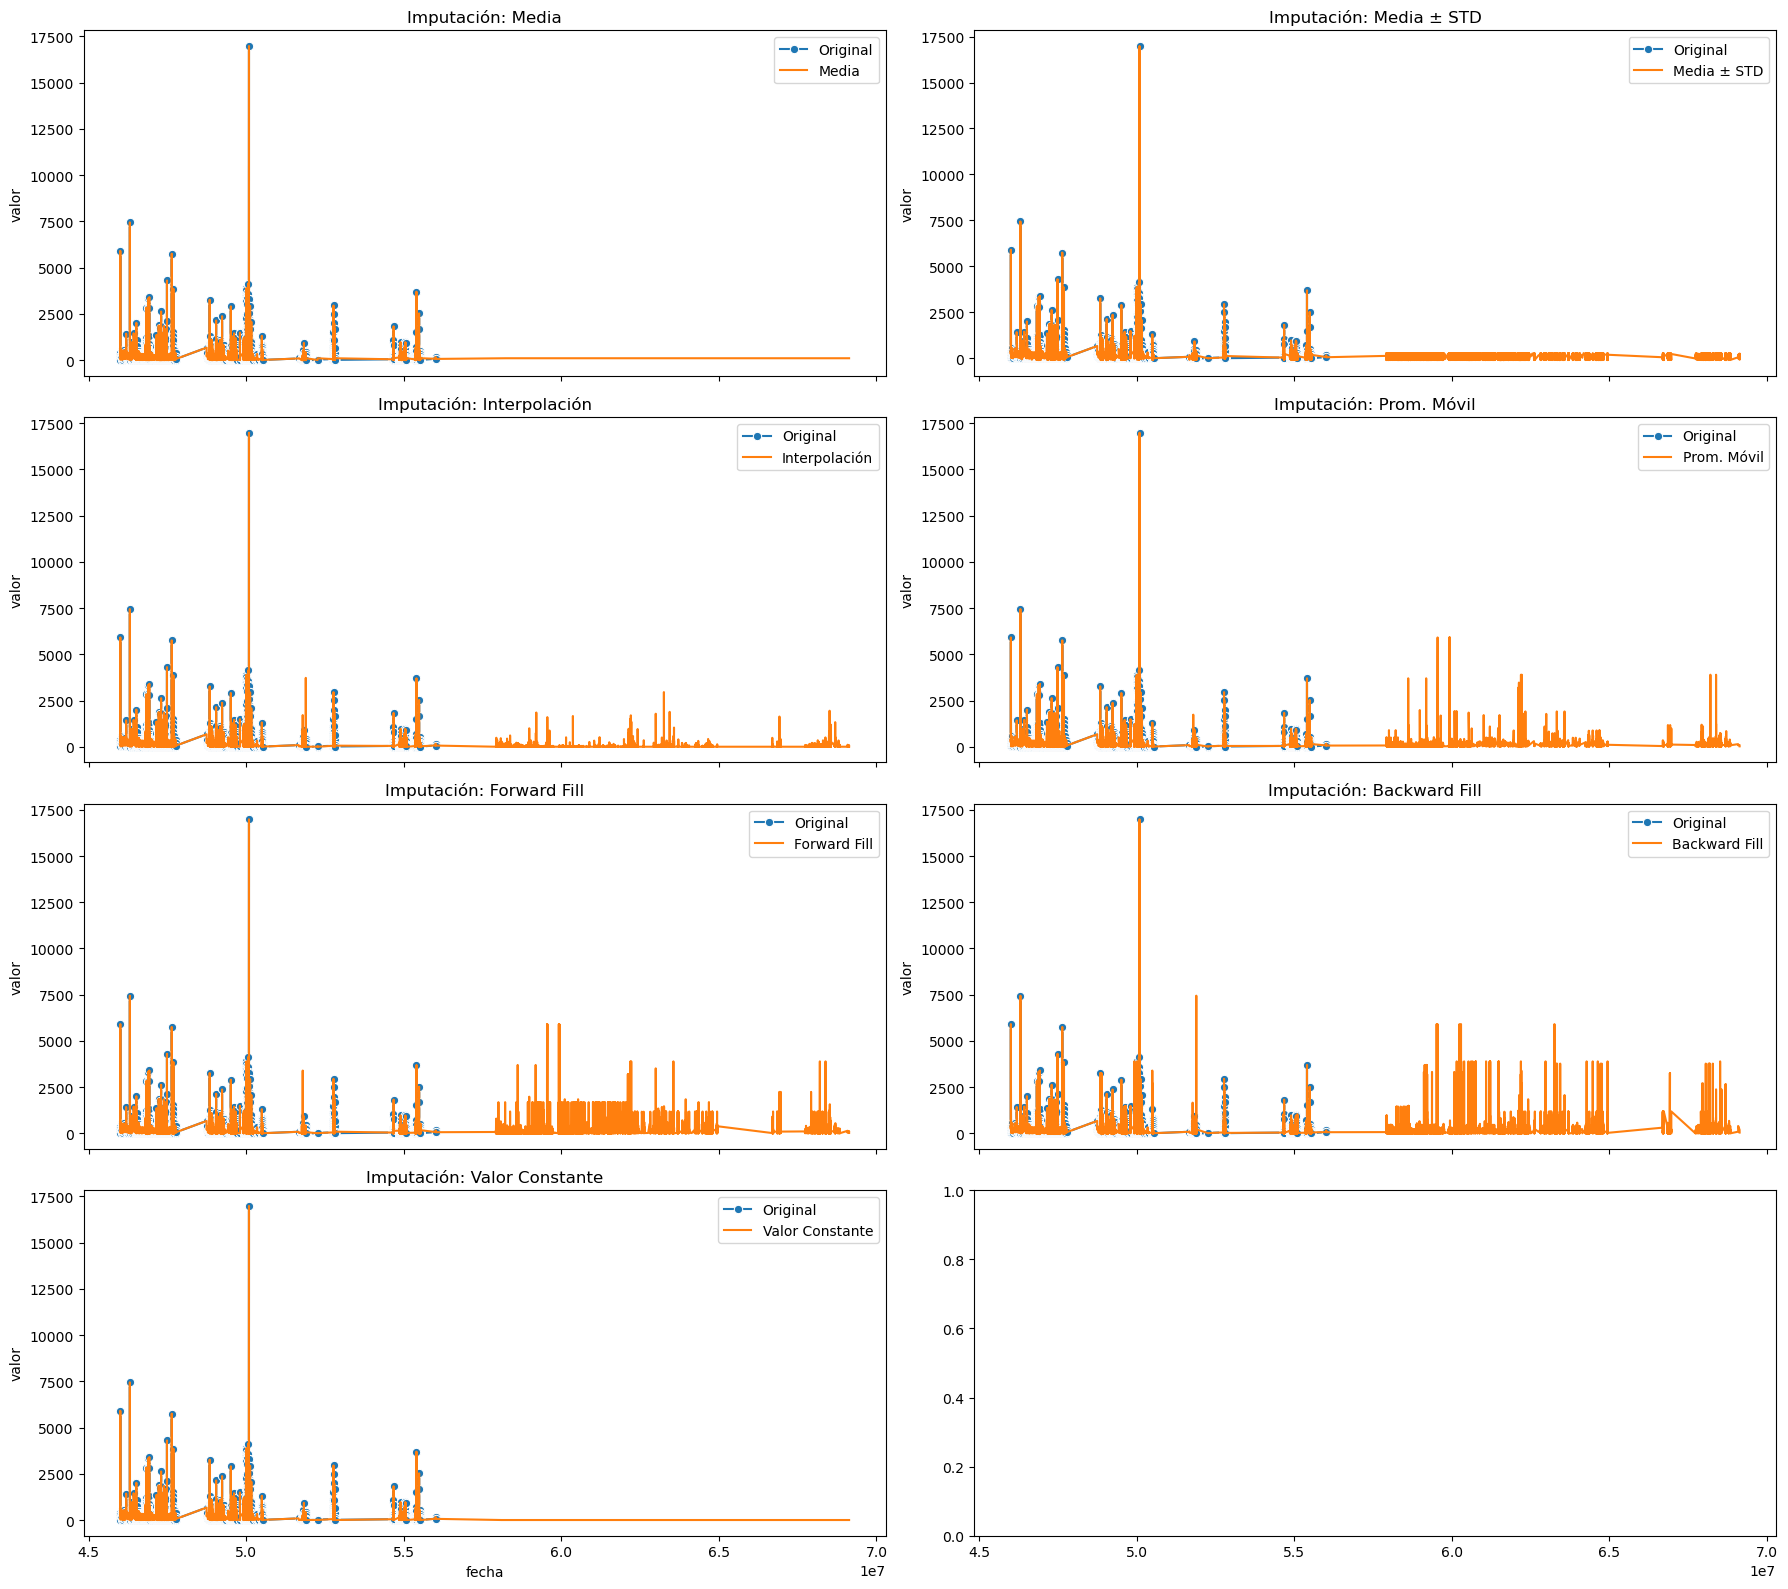

In [79]:
# Comparación visual de los métodos
# Crear figura con subplots 4x2 (8 espacios, usaremos 7)
fig, axes = plt.subplots(4, 2, figsize=(18, 16), sharex=True)

# Lista de imputaciones y sus nombres
methods = [df_media, df_std, df_interp, df_movavg, df_ffill, df_bfill, df_const]
titles = ['Media', 'Media ± STD', 'Interpolación', 'Prom. Móvil', 'Forward Fill', 'Backward Fill', 'Valor Constante']

# Graficar cada método junto a la serie original
for ax, df_met, title in zip(axes.flat, methods, titles):
    sns.lineplot(data=df_plot, x='fecha', y='valor', label='Original', ax=ax, marker='o')
    sns.lineplot(data=df_met, x='fecha', y='valor', label=title, ax=ax)
    ax.set_title(f"Imputación: {title}")
    ax.legend()

plt.tight_layout()
plt.show()



In [81]:
################################################# Normalización de Datos #################################

In [ ]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df= df_plot.copy()

In [85]:
df.describe()

,fecha,valor
count,6.373600e+04,34971.000000
mean,5.425289e+07,99.394954
std,6.675800e+06,191.162759
min,4.600003e+07,0.030000
25%,4.770244e+07,27.000000
50%,5.180459e+07,63.000000
75%,6.037383e+07,121.000000
max,6.913051e+07,16983.600000


In [87]:
# 2. Normalización Min-Max: escala cada valor entre 0 y 1
df_minmax = df.copy()
for col in df_minmax.columns:
    min_val = df_minmax[col].min()
    max_val = df_minmax[col].max()
    df_minmax[col] = (df_minmax[col] - min_val) / (max_val - min_val)

In [89]:
df_minmax.describe()

,fecha,valor
count,63736.000000,34971.000000
mean,0.356796,0.005851
std,0.288615,0.011256
min,0.000000,0.000000
25%,0.073600,0.001588
50%,0.250948,0.003708
75%,0.621423,0.007123
max,1.000000,1.000000


In [91]:
# 3. Z-Score
df_zscore = df.copy()
for col in df_zscore.columns:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()
    df_zscore[col] = (df_zscore[col] - mean) / std

In [93]:
df_zscore.describe()

,fecha,valor
count,6.373600e+04,3.497100e+04
mean,1.997760e-16,1.983042e-16
std,1.000000e+00,1.000000e+00
min,-1.236235e+00,-5.197924e-01
25%,-9.812225e-01,-3.787085e-01
50%,-3.667428e-01,-1.903873e-01
75%,9.168857e-01,1.130191e-01
max,2.228590e+00,8.832371e+01


In [95]:
# 4. Escalamiento Six Sigma: media 0, rango de ±3σ → [0,1]
df_sixsigma = df.copy()
for col in df_sixsigma.columns:
    mean = df_sixsigma[col].mean()
    std = df_sixsigma[col].std()
    df_sixsigma[col] = (df_sixsigma[col] - mean + 3*std) / (6*std)

In [97]:
df_sixsigma.describe()

,fecha,valor
count,63736.000000,34971.000000
mean,0.500000,0.500000
std,0.166667,0.166667
min,0.293961,0.413368
25%,0.336463,0.436882
50%,0.438876,0.468269
75%,0.652814,0.518837
max,0.871432,15.220619


In [99]:
# 5. Escalado robusto con IQR (percentil 25-75)
df_robust = df.copy()
for col in df_robust.columns:
    q1 = df_robust[col].quantile(0.25)
    q3 = df_robust[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df_robust[col] - q1) / iqr

In [101]:
df_robust.describe()

,fecha,valor
count,63736.000000,34971.000000
mean,0.516948,0.770159
std,0.526840,2.033646
min,-0.134351,-0.286915
25%,0.000000,0.000000
50%,0.323733,0.382979
75%,1.000000,1.000000
max,1.691059,180.389362


In [103]:
# 6. Escalado logarítmico: útil para datos con alta dispersión positiva
df_log = df.copy()
for col in df_log.columns:
    min_val = df_log[col].min()
    df_log[col] = np.log1p(df_log[col] - min_val + 1)  # log(x - min + 1)

In [105]:
df_log.describe()

,fecha,valor
count,63736.000000,34971.000000
mean,15.438680,4.063601
std,1.108060,1.084247
min,0.693147,0.693147
25%,14.347559,3.366261
50%,15.574154,4.173926
75%,16.480918,4.811940
max,16.956662,9.740119


In [107]:
# 7. MaxAbs Scaling: divide por el valor absoluto máximo
df_maxabs = df.copy()
for col in df_maxabs.columns:
    max_abs = np.abs(df_maxabs[col]).max()
    df_maxabs[col] = df_maxabs[col] / max_abs

In [109]:
df_maxabs.describe()

,fecha,valor
count,63736.000000,34971.000000
mean,0.784789,0.005852
std,0.096568,0.011256
min,0.665409,0.000002
25%,0.690035,0.001590
50%,0.749374,0.003709
75%,0.873331,0.007125
max,1.000000,1.000000


In [111]:
# 8. Escalamiento Six Sigma basado en limites
df_sixsigma = df.copy()
df_clipped = df.copy()

# Escalamiento tipo Six Sigma y clipping
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()

    # Escalamiento normal al rango [0,1] usando el rango de 6σ
    df_sixsigma[col] = (df[col] - mean + 3 * std) / (6 * std)

    # Límite inferior y superior (3σ)
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std

    # Clipping: sustituir valores fuera de ±3σ con los límites
    df_clipped[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

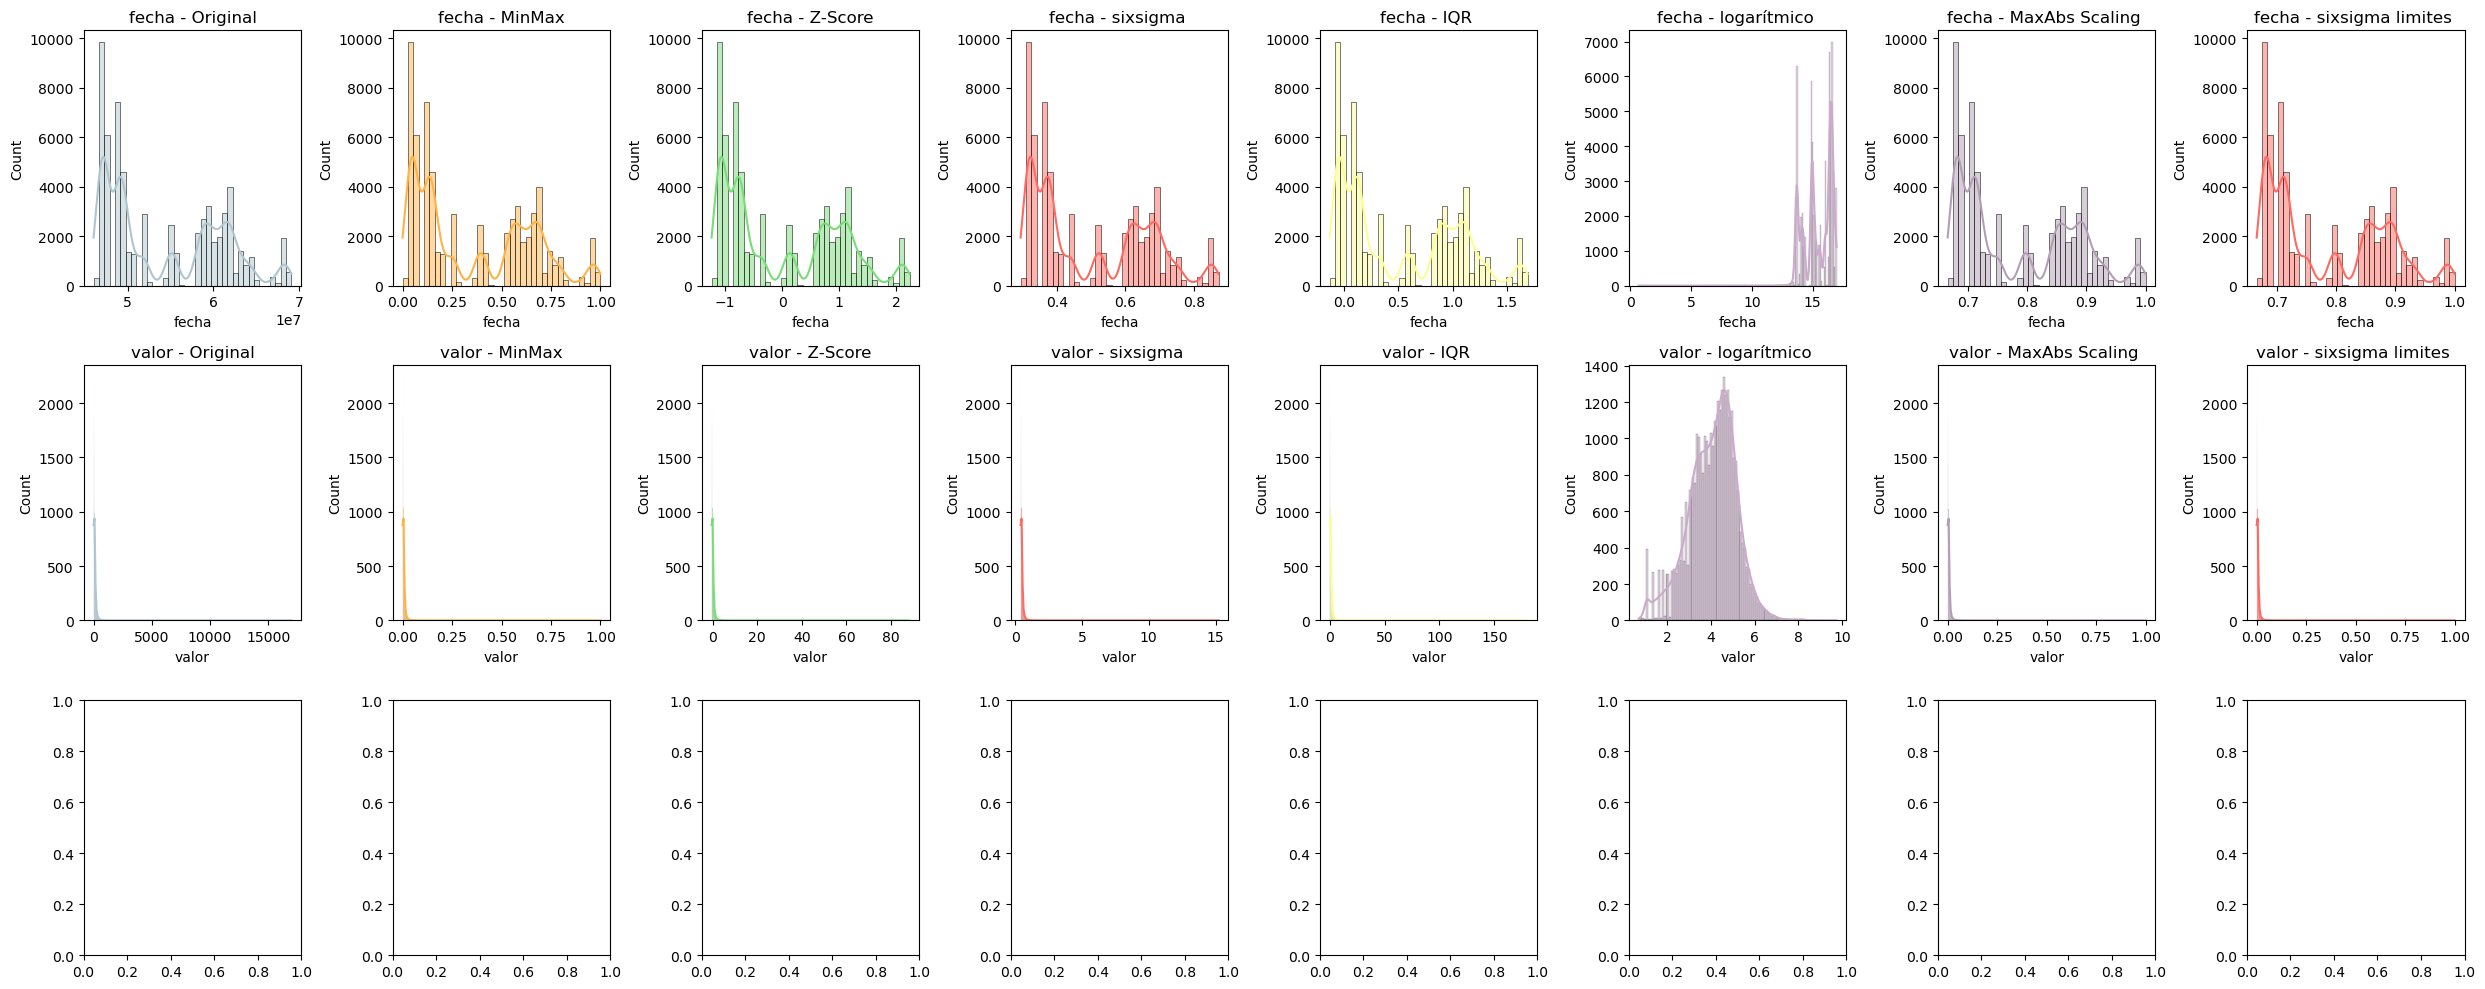

In [113]:
# Comparar distribuciones originales vs normalizadas
fig, axes = plt.subplots(3, 8, figsize=(25, 10))
cols = df.columns

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i][0], kde=True, color="#AEC6CF")
    axes[i][0].set_title(f"{col} - Original")
    
    sns.histplot(df_minmax[col], ax=axes[i][1], kde=True, color="#FFB347")
    axes[i][1].set_title(f"{col} - MinMax")
    
    sns.histplot(df_zscore[col], ax=axes[i][2], kde=True, color="#77DD77")
    axes[i][2].set_title(f"{col} - Z-Score")
    
    sns.histplot(df_sixsigma[col], ax=axes[i][3], kde=True, color="#FF6961")
    axes[i][3].set_title(f"{col} - sixsigma ")
    
    sns.histplot(df_robust[col], ax=axes[i][4], kde=True, color="#FDFD96")
    axes[i][4].set_title(f"{col} - IQR ")
    
    sns.histplot(df_log[col], ax=axes[i][5], kde=True, color="#CBAACB")
    axes[i][5].set_title(f"{col} - logarítmico ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][6], kde=True, color="#B39EB5")
    axes[i][6].set_title(f"{col} - MaxAbs Scaling ")
    
    sns.histplot(df_maxabs[col], ax=axes[i][7], kde=True, color="#FF6961")
    axes[i][7].set_title(f"{col} - sixsigma limites ")


plt.tight_layout()
plt.show()

In [ ]:
#| Técnica       | Uso Principal                          | Sensible a outliers |
#| ------------- | -------------------------------------- | ------------------- |
#| Min-Max       | Escala uniforme \[0, 1]                |  Sí                |
#| Z-Score       | Estandarización clásica                |  Sí                |
#| Six Sigma     | Datos bajo control de calidad          |  Sí                |
#| IQR (Robusto) | Datos con outliers extremos            |  No                |
#| Logarítmico   | Datos sesgados a la derecha            |  Sí                |